<b>Coding Assignment 4<br>
CS 401: Quantum Computing <br>
Dr. Kell, Spring 2023 </b>

<b> Instructions </b> 

To complete the assignment, please fill in all coding cells as instructed below, and then submit the file on Notebowl once completed. Before you turn in your submission, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All). Make sure you fill in any place that says YOUR CODE GOES HERE.
    
<b> Constraints on references and collaborations</b>
    
 <item> <i> You may:</i> Reference any chapter from the course textbook, references, and relevant Wikipedia pages. You are permitted to collaborate with others in the class in groups of 2-3, but these collaborations should be solely conceptual (i.e., clarifying the problem, brainstorming algorithms, etc.).
     
 <item> <i> You may not</i>: 
     
* You may not share code or work with others when writing your code.
<br> 
     
* Reference the Qiskit CHSH guide.
    
<b> Finally: Be sure to use proper coding style for all your solutions!</b> For example, you should write docstrings for all functions, include useful in-line comments explaining how your code works, write clean code with readable variable names, etc.. You will lose points if you write sloppy code with poor style (e.g., not writing docstrings for any of your functions). 
    
Best of luck!

In [1]:
# Specify your name below
NAME = "Your Name"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, cmath, math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, state_visualization
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city 
import qis401
from mpl_toolkits.mplot3d import Axes3D

## Part 1 [25 points] 

In this first part, you will write a Monte Carlo simulation that experimentally computes the set of optimal deterministic strategies for the classical version of the CHSH game. (By 'deterministic' we mean that both Alice and Bob are not allowed to use randomization when determining their response.) 

Observe that given the setup of the game, a deterministic strategy for a fixed player can be specified by a binary function  $f:\{0, 1\} \rightarrow \{0, 1\}$, where the input bit corresponds to the move played by either Charlie/Lucy, and the output bit corresponds to the response played by Alice/Bob. 

Thus, both Alice and Bob have four possibilities to choose from: 

* $f(0) = 0 \text{ and } f(1) = 0$ (call this strategy '0s') 
* $f(0) = 1 \text{ and } f(1) = 1$ (call this strategy '1s') 
* $f(0) = 0 \text{ and } f(1) = 1$ (call this strategy 'same') 
* $f(0) = 1 \text{ and } f(1) = 0$ (call this strategy 'flip') 

The goal of the simulation is to (i) verify that optimal win probability is 0.75 and (ii) determine which strategy pairs achieve this win probability.

In particular, implement a function called <code>optimal_chsh_strats(trials_per_strat)</code> that takes in an int <code>trials_per_strat</code> and returns a list of tuples specifying the optimal strategy pairs using the naming convention above (e.g., based on our discussion in class, <code>('0s', '0s')</code> should one of the tuples in the list).

To determine win probability for each strategy pair, the function must use a Monte Carlo algorithm to simulate the game <code>trials_per_strat</code> number of times. As you increase <code>trials_per_strat</code>, the win probabilities of the optimal strategies should converge to 0.75. 

Furthermore, your function must also generate a plot that displays the win probability for each strategy pair. For example, your plot might look something like: 

<div align="center">
<img src="classic_chsh_plot.png" width="400">
</div>

You are not required to make a 3D plot, but the plot should make it fairly clear what the win probabilities are of each strategy pair. (For examples on how to generate 3D plots in matplotlib, see the [matplotlib 3D plot page](https://matplotlib.org/stable/gallery/mplot3d/index.html) as well as this [tutorial](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html).)

Also note there are no requirements on how to structure your implementation, but it will be best if you write additional helper functions that breakdown the solution into natural subroutines (e.g., you will likely lose points on coding style if your solution is one giant messy function that's difficult to read).

In [3]:
# Define the four functions using dictionary mapping the keys to values
zeros = {0: 0, 1: 0}
ones = {0: 1, 1: 1}
same = {0: 0, 1: 1}
flip = {0: 1, 1: 0}

# Define the strategy corresponding to the function
strats = {"0s": zeros, "1s": ones, "same": same, "flip": flip}

# Define the axis of the 3D histogram chart
order = ["0s", "1s", "same", "flip"]
order2 = [i for i in range(4)]

# Define the 4 possible choices of Charlie and Lucy
choices = [(0, 0), (0, 1), (1, 0), (1, 1)]

In [4]:
def optimal_chsh_strats(trials_per_strat):
    """
    This function simulate every pair of strategies to get the optimal strategies for CHSH game
    Parameter:
        trials_per_strat: the number of trials per pair of strategies
    
    Return:
        A list of optimal strategies
    """

    # Define the opttimal ratio
    optimal_ratio = 0.75

    # Define the list of best strategy
    best_strat = []

    # Define the 2D list to plot the histogram
    data = [["" for i in range(4)] for j in range(4)]

    # Iterate over every strategies
    for strat1 in strats:
        for strat2 in strats:

            # Simulate the strategy over a number of trials
            win_ratio = simulate_result(trials_per_strat, strat1, strat2)

            # Assign the win_ratio with its corresponding data
            data[order.index(strat1)][order.index(strat2)] = win_ratio

            # If the win_ratio is within 10% deviation from the optimal ratio, consider it as an optimal strategy
            if min(win_ratio/optimal_ratio, optimal_ratio/win_ratio) >= 0.9:
                best_strat.append((strat1, strat2))
    
    

    # prepare 3d axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Process the data
    x_data, y_data = np.meshgrid(order2, order2)
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = np.array(data).flatten()

    z_size = np.zeros(z_data.shape[0])
    x_size = np.ones(x_data.shape[0])/3
    y_size = np.ones(y_data.shape[0])/3
    
    ax.bar3d(x_data, y_data, z_size, x_size, y_size, z_data)

    # Reassigning the labels
    ax.set_xticks(np.arange(4) + 0.5)
    ax.set_xticklabels(order)

    ax.set_yticks(np.arange(4) + 0.5)
    ax.set_yticklabels(order)

    # Set the heights of the bars
    ax.set_zlim([0,1])


    plt.show()

    return best_strat


def simulate_result(trials_per_strat, strat1, strat2):
    """
    This function simulate the winning ratio of a pair of strategies strat1 and strat2 with a number of trials (trials_per_strat)
    Parameter:
        trials_per_strat: the number of trials per pair of strategies
        strat1: strategy for Alice
        strat2: strategy for Bob
    
    Return:
        The winning probability of trials_per_strat trials given a pair of strategies
    
    """
    correct = 0 # Store the number of corrects
    for i in range (trials_per_strat):
        # Randomly choose the choice of Charlie and Lucy
        choice = choices[math.floor(random.random()/0.25)]

        # Calculate the result of Charlie and Lucy
        xy_result = choice[0] and choice[1]

        # Given the strategies of Alice and Bob, calculate the choices of Alice and Bob and 
        # calculate their result
        ab_result = (strats[strat1][choice[0]] + strats[strat2][choice[1]])%2

        # Check if it is correct
        if xy_result == ab_result:
            correct += 1
    
    # Return the winning ratio
    return correct/trials_per_strat

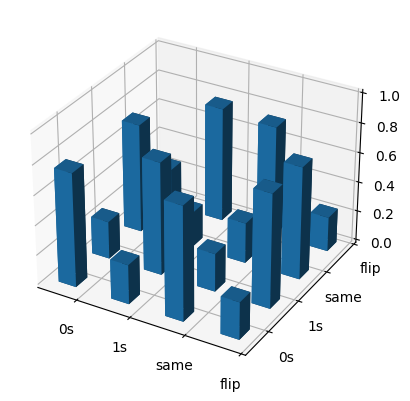

[('0s', '0s'), ('0s', 'same'), ('1s', '1s'), ('1s', 'flip'), ('same', '0s'), ('same', 'flip'), ('flip', '1s'), ('flip', 'same')]


In [5]:
# GENERATE YOUR OUTPUT HERE (DELETE THIS COMMENT)
print(optimal_chsh_strats(1000))

## Part 2 [25 points] 

You will now implement the optimal quantum CHSH strategy we saw in class using Qiskit. In particular, you must implement the following two functions:

* <code>make_chsh_circuit()</code>: returns a QuantumCircuit object implementing the optimal quantum CHSH game strategy. Your circuit should have four classical registers that at the end of the computation collectively contain the outputs played by the four players in the game (Alice, Bob, Charlie, and Lucy). Note that - as discussed in lecture - since you cannot initialize the values of ClassicalRegister objects, you will need to simulate Charlie and Lucy's outputs using Quantum gates + measurement. 


* <code>quantum_chsh_montecarlo(trials)</code>: performs a Monte Carlo algorithm that simulates the CHSH game quantum circuit <code>trials</code> number of times and returns the percentage of trials that result in wins. On each trial, you should call <code>make_chsh_circuit()</code> to construct the circuit. Then after simulating the circuit, you should then use the values of the four classical registers to determine the outcome of the game. 

To display your output, in the first cell you should call <code>make_chsh_circuit()</code> to obtain the circuit and then use the <code>draw()</code> method to display the circuit itself. In the next cell, call  <code>quantum_chsh_montecarlo()</code> to print the resulting probability. As you increase the number of trials, your answer should converge to $\cos^2\left(\frac{\pi}{8}\right) \approx .8535$.


In [6]:
def make_epr(circ, alice, bob):
    """
    This function transforms the state of a and b into an EPR pair.
    """
    circ.h(alice)
    circ.cx(alice, bob)
    # Create a barrier at the end.
    circ.barrier()

def is_winning(str):
    """
    This function check if the result is a winning configuration or not.
    """
    return (int(str[3]) + int(str[2]))%2 == (int(str[1]) and int(str[0]))

def make_chsh_circuit():
    """
    This function create a circuit that simulate the optimal strategy of playing CHSH game
    using Quantum Mechanics
    Parameter:
        None
    
    Return:
        The circuit simulating the optimal strategy for CHSH game
    """
    # The 4 Classical Registers are Alice, Bob, Charlie and Lucy
    # Note: in the output, the order is Lucy, Charlie, Bob and Alice if read upward from left to right
    abcl = ClassicalRegister(4, "abcl")

    # Create a quantum register for Alice, Bob, Charlie and Lucy
    charlie_quantum = QuantumRegister(1, "charlie_quantum")
    lucy_quantum = QuantumRegister(1, "lucy_quantum")

    # the first one is for Alice, the second one is for Bob
    alice_bob = QuantumRegister(2, "alice_bob")
    circ = QuantumCircuit(alice_bob, charlie_quantum, lucy_quantum, abcl)

    # First, we create an EPR pair for alice and Bob
    make_epr(circ, alice_bob[0], alice_bob[1])

    # Create an H gate for both Charlie and Lucy so that states 0 and 1 have 50-50% chance.
    # This simulate the behavior of choosing Charlie and Lucy uniformly random.
    circ.h(charlie_quantum)
    circ.h(lucy_quantum)
    # Measure the states of Charlie and Lucy
    circ.measure(charlie_quantum, abcl[2])
    circ.measure(lucy_quantum, abcl[3])
    circ.barrier()

    # If Charlie choose 1, we change the measuring basis for Alice to be + and - by multiplying by the rotation matrix by pi/4
    circ.ry(math.pi/2, alice_bob[0]).c_if(abcl[2], 1)

    # Change the basis for Bob based on the measurement of Lucy. Either rotate pi/8 or -pi/8
    circ.ry(math.pi/4, alice_bob[1]).c_if(abcl[3], 0)
    circ.ry(-math.pi/4, alice_bob[1]).c_if(abcl[3], 1)
    circ.barrier()

    # Measure the result of Alice and Bob
    circ.measure(alice_bob[0], abcl[0])
    circ.measure(alice_bob[1], abcl[1])
    
    return circ

def quantum_chsh_montecarlo(trials):
    """
    This function runs the optimal CHSH circuit and calculate the winning ratio.
    Parameter:
        trials: the number of trials to run
    
    Return:
        The winning ratio of the optimal strategy
    """
    win = 0
    total = 0

    for i in range(trials):
        # Make circuit and simulate it
        circ = make_chsh_circuit()
        result = qis401.simulate_circuit(circ)

        # Get the result of the simulation
        counts = result.get_counts(circ)

        # Iterate over every output and compute the number of win and lose.
        for state in counts:
            if is_winning(state):
                win += counts[state]
            total += counts[state]
    
    # Print out the probability of winning over every trial.
    print(f"The average winning probability of {trials} trials is {win*100/total}")

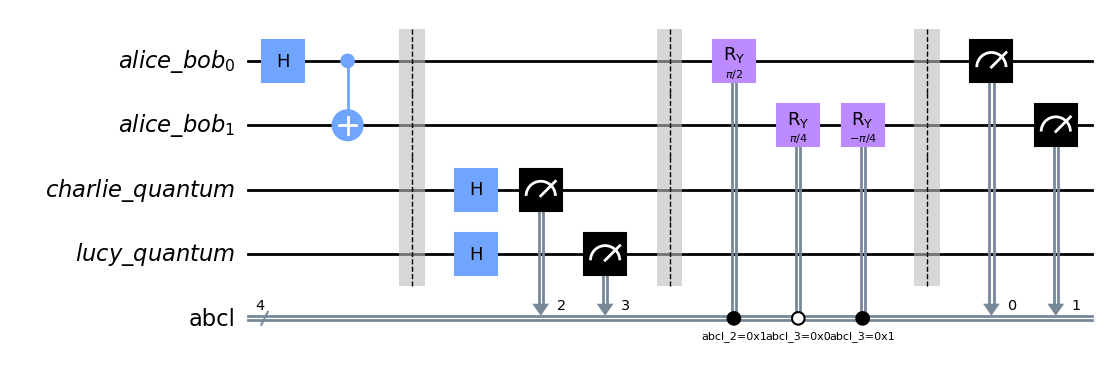

In [7]:
circ = make_chsh_circuit()
circ.draw("mpl")

In [8]:
quantum_chsh_montecarlo(1000)

The average winning probability of 1000 trials is 85.3462890625
